In [7]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np


In [8]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/project_config.yaml"
fname = "/home/charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_segmentation_metadata=True)

INFO - 2022-02-01 17:35:29,702 - utils_filenames - File for mode automatic exists at precendence: 1/3
INFO - 2022-02-01 17:35:29,703 - utils_filenames - Read data from: /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/postprocessing/combined_3d_tracks-6.h5
INFO - 2022-02-01 17:35:29,704 - utils_filenames - Using most recently modified file
INFO - 2022-02-01 17:35:29,706 - finished_project_data - Starting threads to read data...
INFO - 2022-02-01 17:35:29,707 - finished_project_data - First time loading the all tracklets, may take a while...
INFO - 2022-02-01 17:35:32,547 - utils_filenames - File for mode newest exists at precendence: 1/3
INFO - 2022-02-01 17:35:32,550 - utils_filenames - Read data from: /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/postprocessing/wiggle_split_tracklets.h5
WARNING - 2022-02-01 17:35:32,551 - utils_filenames - Not using most recently modified file (mode wiggle)
INFO - 2022-02-01 17:35:32,590 - utils_filenames - File for mode manual e

Original fname /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/global2tracklet_manual-4.pickle exists, so will be suffixed
Removed suffix -4, so the basename is taken as: global2tracklet_manual
Original fname /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/manually_split_tracklets-4.h5 exists, so will be suffixed
Removed suffix -4, so the basename is taken as: manually_split_tracklets
Output files for annotator: /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/global2tracklet_manual-4.pickle, /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/manually_split_tracklets-4.h5, /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/split_times.pickle


INFO - 2022-02-01 17:35:33,169 - finished_project_data - Read all data


Project data for directory:
/home/charles/dlc_stacks/worm3-tracklet_wiggle 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
behavior_annotations:     True
============Training================
df_training_tracklets:    True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



# Build the fdnc prediction object, and visualize

In [35]:
from DLC_for_WBFM.utils.nn_utils.fdnc_class import fDNCTracker

In [36]:
tracker = fDNCTracker.load_from_project_data(project_data)

INFO - 2022-02-01 17:42:37,168 - fdnc_predict - Found cuda!
WARNING - 2022-02-01 17:42:37,169 - project_config_classes - Using default physical unit conversions


In [37]:
pts1 = tracker.get_pts(project_data, 1)
matches01 = tracker.predict_matches_from_points(pts1)

In [38]:
matches01[:5]

[(8, 0, 0.37564877),
 (7, 1, 0.82842296),
 (2, 2, 0.9179145),
 (5, 3, 0.31335077),
 (1, 4, 0.8594598)]

In [12]:
from DLC_for_WBFM.utils.visualization.visualization_tracks import visualize_tracks
from DLC_for_WBFM.utils.general.point_clouds.point_cloud_class import PointCloudPair

In [7]:
visualize_tracks(tracker.template, pts1, matches=np.array(matches01)[:, :2])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


[LineSet with 138 lines.,
 PointCloud with 145 points.,
 PointCloud with 147 points.]

In [29]:
pts1 = tracker.get_pts(project_data, 1)
matches = tracker.visualize_matches_open3d(pts1);

In [30]:
pc_pair = PointCloudPair(tracker.template, pts1, matches)

In [31]:
pc_pair.visualize_matches_open3d()

In [32]:
pc_pair.visualize_matches_open3d(True)

# Re-match using prerotation

In [121]:
pts1 = tracker.get_pts(project_data, 1)
matches_raw = tracker.predict_matches_from_points(pts1);
# Initial matches
pc_pair_raw = PointCloudPair(tracker.template, pts1, matches_raw, confidence_threshold=0.1)

transformed_pts1 = pc_pair_raw.transformed_pts1.copy()
matches_transformed = tracker.predict_matches_from_points(transformed_pts1);
pc_pair_transformed = PointCloudPair(tracker.template, transformed_pts1, matches_transformed, confidence_threshold=0.1)

In [122]:
pc_pair_raw.visualize_matches_open3d(rigidly_rotate=False)

In [123]:
pc_pair_raw.visualize_matches_open3d(rigidly_rotate=True)

In [57]:
pc_pair_transformed.visualize_matches_open3d()

# Use the leifer template

In [87]:
tracker = fDNCTracker.load_from_project_data(project_data, initialize_template=False)

In [94]:
tracker.initialize_leifer_template()

In [113]:
pts1 = tracker.get_pts(project_data, 177)
matches_raw = tracker.predict_matches_from_points(pts1);
# Initial matches
pc_pair_raw = PointCloudPair(tracker.template, pts1, matches_raw, confidence_threshold=0.1)

# transformed_pts1 = pc_pair_raw.transformed_pts1.copy()
# matches_transformed = tracker.predict_matches_from_points(transformed_pts1);
# pc_pair_transformed = PointCloudPair(tracker.template, transformed_pts1, matches_transformed, confidence_threshold=0.1)

In [114]:
pc_pair_raw.visualize_matches_open3d(rigidly_rotate=False)

In [115]:
pc_pair_raw.visualize_matches_open3d(rigidly_rotate=True)

# Use CPD (leifer implementation)

In [9]:
from fDNC.src.cpd_rigid_sep import register_rigid

In [11]:
pts0 = tracker.template
pts1 = tracker.get_pts(project_data, 1)

# out = register_translation(pts0, pts1, w=0.1)

In [10]:
from probreg import bcpd, cpd
from DLC_for_WBFM.utils.visualization.visualization_tracks import build_pair_of_point_clouds
from probreg import callbacks

_, _, pc0, pc1 = build_pair_of_point_clouds(pts0, pts1)
# cbs = [callbacks.Open3dVisualizerCallback(pc0, pc1)]

bcpd_kwargs = {'lmd':5.0, 'k':1e20, 'gamma':0.1}
options = {'w': 0.01, 'maxiter': 100, 'tol': 1e-16}
tf_param = bcpd.registration_bcpd(pc0, pc1, **options, **bcpd_kwargs)

transform_pc0 = tf_param.transform(pc0.points)
pc_pair_cpd = PointCloudPair(pts0, np.array(transform_pc0), None, confidence_threshold=0.1)
pc_pair_cpd.visualize_matches_open3d()

# Do filterreg

In [12]:
from probreg import features
from probreg import filterreg

In [3]:
pts0 = tracker.template
pts1 = tracker.get_pts(project_data, 1)

_, _, pc0, pc1 = build_pair_of_point_clouds(pts0, pts1)
cbs = [callbacks.Open3dVisualizerCallback(pc0, pc1)]
# cbs = []

objective_type = 'pt2pt'
# tf_param, _, _ = filterreg.registration_filterreg(pc0, pc1,
#                                                   maxiter=200,
#                                                   w=0.1,
#                                                   tol=1e-12,
#                                                   objective_type=objective_type,
#                                                   update_sigma2=True,
#                                                   sigma2=1000000, feature_fn=features.FPFH(),
#                                                   callbacks=cbs)

NameError: name 'tracker' is not defined

In [87]:

transform_pc0 = tf_param.transform(pc0.points)
pc_pair_cpd = PointCloudPair(pts1, np.array(transform_pc0), None, confidence_threshold=0.1)
pc_pair_cpd.visualize_matches_open3d()

In [81]:
# np.array(transform_pc0) - pts0
# pc_pair_raw = PointCloudPair(pts0, pts1, None, confidence_threshold=0.1)
# pc_pair_raw.visualize_matches_open3d()

# Simple FPFH


In [43]:
from DLC_for_WBFM.utils.visualization.visualization_tracks import build_pair_of_point_clouds
from DLC_for_WBFM.utils.external.utils_networkx import calc_bipartite_from_positions
import open3d as o3d



In [97]:

pts0 = tracker.get_pts(project_data, 0)
pts1 = tracker.get_pts(project_data, 1)
_, _, pc0, pc1 = build_pair_of_point_clouds(pts0, pts1)

radius_feature = 0.1
radius_normal = 0.1
max_nn = 100

pc0.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=max_nn))
fpfh0 = o3d.pipelines.registration.compute_fpfh_feature(
        pc0,
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=max_nn))

pc1.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=max_nn))
fpfh1 = o3d.pipelines.registration.compute_fpfh_feature(
        pc1,
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=max_nn))

In [98]:
matches, conf, _ = calc_bipartite_from_positions(fpfh0.data.T, fpfh1.data.T)

pc_pair_cpd = PointCloudPair(pts0, pts1, matches, confidence_threshold=0.0)
pc_pair_cpd.visualize_matches_open3d()

([array([ 0.,  4., 10., 25., 24., 37., 26., 12., 11.,  6.]),
  array([ 1.,  2.,  1.,  9., 21., 80., 41.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0., 44., 95., 16.,  0.,  0.,  0.])],
 array([-0.93137836, -0.75906402, -0.58674969, -0.41443535, -0.24212101,
        -0.06980667,  0.10250767,  0.274822  ,  0.44713634,  0.61945068,
         0.79176502]),
 <a list of 3 Lists of Patches objects>)

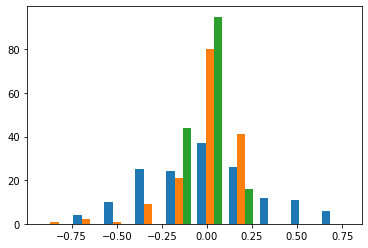

In [74]:
plt.hist(pts0)

In [99]:
import pickle
fname = "/scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/multiple_templates/global2tracklet.pickle"

In [100]:
with open(fname, 'rb') as f:
    dat = pickle.load(f)

In [101]:
dat

defaultdict(list,
            {'neuron_035': ['tracklet_0023476',
              'tracklet_0012612',
              'tracklet_0023860',
              'tracklet_0023661',
              'tracklet_0015337',
              'tracklet_0023861',
              'tracklet_0023077',
              'tracklet_0023354',
              'tracklet_0014855',
              'tracklet_0022947',
              'tracklet_0023210',
              'tracklet_0013492',
              'tracklet_0012901',
              'tracklet_0013306',
              'tracklet_0024834'],
             'neuron_030': ['tracklet_0023664',
              'tracklet_0023417',
              'tracklet_0020733',
              'tracklet_0003964',
              'tracklet_0014104',
              'tracklet_0021850',
              'tracklet_0023716',
              'tracklet_0002581',
              'tracklet_0020105',
              'tracklet_0014834',
              'tracklet_0022511'],
             'neuron_029': ['tracklet_0019178',
              'track